In [2]:
# Import necessary libraries
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [3]:
# Define paths to your datasets
train_data_dir = 'C:\\Users\\Hp\\Desktop\\ImageDetectionDataset\\Train'
validation_data_dir = 'C:\\Users\\Hp\\Desktop\\ImageDetectionDataset\\Valid'

In [4]:
# Define image size and batch size
img_size = (299, 299)
batch_size = 32

In [5]:
# Load InceptionV3 model without top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

In [6]:
# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

In [7]:
# Add custom classification layers
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification (leaf or non-leaf)


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# Data augmentation for training
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)


In [10]:
# No data augmentation for validation
validation_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
# Load and augment the training data
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='binary')

Found 534 images belonging to 2 classes.


In [12]:

# Load the validation data
validation_generator = validation_datagen.flow_from_directory(validation_data_dir,
                                                              target_size=img_size,
                                                              batch_size=batch_size,
                                                              class_mode='binary')


Found 641 images belonging to 2 classes.


In [13]:

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size)

Epoch 1/10
16/16 [==============================] - 107s 7s/step - loss: 0.2069 - accuracy: 0.8984 - val_loss: 0.0214 - val_accuracy: 0.9937
Epoch 2/10
16/16 [==============================] - 86s 6s/step - loss: 0.0170 - accuracy: 0.9960 - val_loss: 0.0123 - val_accuracy: 0.9969
Epoch 3/10
16/16 [==============================] - 99s 6s/step - loss: 0.0121 - accuracy: 0.9960 - val_loss: 0.0221 - val_accuracy: 0.9906
Epoch 4/10
16/16 [==============================] - 107s 7s/step - loss: 0.0079 - accuracy: 0.9980 - val_loss: 0.0058 - val_accuracy: 0.9984
Epoch 5/10
16/16 [==============================] - 112s 7s/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0227 - val_accuracy: 0.9906
Epoch 6/10
16/16 [==============================] - 111s 7s/step - loss: 0.0164 - accuracy: 0.9960 - val_loss: 0.0098 - val_accuracy: 0.9969
Epoch 7/10
16/16 [==============================] - 111s 7s/step - loss: 0.0065 - accuracy: 0.9961 - val_loss: 0.0054 - val_accuracy: 0.9984
Epoch 8/10
16/1

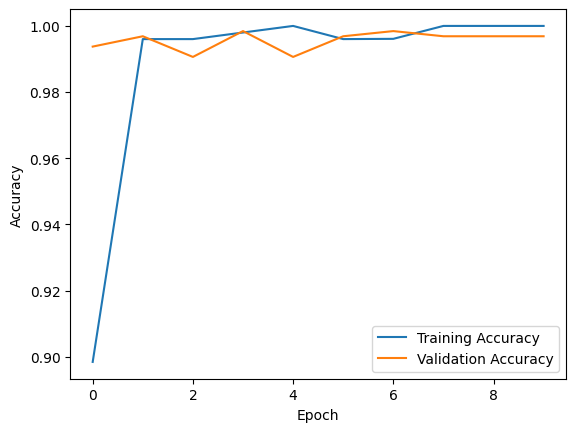

In [14]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:

# Save the model for later use
model.save('LeafDetectionModel.h5')

C:\Users\Hp\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = models.load_model('LeafDetectionModel.h5')

# Define the path to the image you want to classify
image_path =input()
# Load and preprocess the image
img = image.load_img(image_path, target_size=(299, 299))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Rescale to match the training data

# Make predictions
predictions = model.predict(img_array)
print(predictions)

# Classify the image based on the prediction
if predictions[0][0] < 0.5:
    
    print("Predicted class: Leaf")
else:
    print("Predicted class:Non-Leaf")


1/1 [==============================] - 2s 2s/step
[[2.5210822e-05]]
Predicted class: Leaf


In [19]:
from tensorflow.keras.models import load_model
import tensorflow as tf

# Load the Keras model
keras_model = load_model('LeafDetectionModel.h5')

# Convert the Keras model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('LeafDetector.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Hp\AppData\Local\Temp\tmpyxiy56mz\assets


INFO:tensorflow:Assets written to: C:\Users\Hp\AppData\Local\Temp\tmpyxiy56mz\assets
